# **Homework 2 - Linear Regression**


In [ ]:
import random
import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
from numpy.linalg import *
np.random.seed(42)  # don't change this line

# **1. Linear Regression**

## **1.1. Linear Regression Implementation [15 pts, autograded]**

In this section you will implement linear regression with both L1 and L2 regularization. Your class LinearRegression must implement the following API:

* `__init__(alpha, tol, max_iter, theta_init, penalty, lambd)`
* `compute_cost(theta, X, y)`
* `compute_gradient(theta, X, y)`
* `fit(X, y)`
* `has_converged(theta_old, theta_new)`
* `predict(X)`

Note that these methods have already been defined correctly for you in the LinearRegression class. **DO NOT** change the API.

### **1.1.1. Cost Function [5 pts]**

The `compute_cost` function should compute the cost for a given $\theta$ vector. The cost is a scalar value given by:

$
\mathcal{L}({\theta}) = \frac{1}{N}\sum_{i =1}^N (h_{{\theta}}({x}_i) - y_i)^2
$

where

> $h_{{\theta}}({x}_i) = \theta^Tx_i$

Based on the regularisation penalty, you may need to add below regularisation penalty loss to MSE Loss computed previously.

L1 Regularisation Loss:
>$
\mathcal{L_1}({\theta}) = \mathcal{L}({\theta}) + \lambda\sum_{j = 1}^D  |{\theta}_j|
$

L2 Regularisation Loss:
>$
\mathcal{L_2}({\theta}) = \mathcal{L}({\theta}) + \lambda\sum_{j = 1}^D  {\theta}_j^2
$

$N$ is the number of training samples and $D$ is the number of features (excluding the intercept term). $\theta$ is a $D + 1$ dimensional vector, with the first element being the intercept term. Note that we do not include the intercept in the regularization terms.

---

### **1.1.2. Gradient of the Cost Function [5 pts]**

The `compute_gradient` function should compute the gradient of the cost function at a given $\theta$.

---

### **1.1.3. Convergence Check [1 pt]**

The `has_converged` function should return whether gradient descent algorithm has converged or not. Refer 1.1.4 for convergence condition.

---

### **1.1.4. Training with Gradient Descent [3 pts]**

The `fit` method should train the model via gradient descent, relying on the cost and gradient functions. The trained weights/coefficients must be stored as `theta_`. The weights and the corresponding cost after every gradient descent iteration must be stored in `hist_theta_` and `hist_cost_` respectively.

* The gradient descent stops or converges when $\theta$ stops changing or changes negligibly between consecutive iterations, i.e., when
$\| {\theta}_\mathit{new} -  {\theta}_\mathit{old} \|_2 \leq \epsilon$,
for some small $\epsilon$ (e.g., $\epsilon$ = 1E-4). $\epsilon$ is stored as `tol` (short for tolerance).

* To ensure that the function terminates, we should set a maximum limit for the number of epochs irrespective of whether $\theta$ converges or not. The limit is stored as `max_iter`.

* `alpha` is the learning rate of the gradient descent algorithm.

---

### **1.1.5. Training with Stochastic Gradient Descent (SGD) [3 pts]**

The `fit_sgd` method should train the model via stochastic gradient descent (SGD), relying on the cost and gradient functions.

The trained weights/coefficients must be stored as `theta_`. The weights and the corresponding cost after every SGD iteration must be stored in `hist_theta_` and `hist_cost_` respectively.

* Unlike regular (or batch) gradient descent, SGD takes a gradient step on a single training example on each iteration. In other words, rather than compute the gradient for all training examples, summing them, and taking a single gradient step, it iterates through training examples, computes the gradient for that training example, and immediately takes a single gradient step before proceeding to the next training example. One pass over the entire training dataset is called an epoch; at the end of an epoch, the next epoch restarts from the first example in the training dataset.

* As with gradient descent, SGD stops or converges when $\theta$ stops changing or changes negligibly between consecutive iterations, i.e., when
$\| {\theta}_\mathit{new} -  {\theta}_\mathit{old} \|_2 \leq \epsilon$,
for some small $\epsilon$ (e.g., $\epsilon$ = 1E-4). $\epsilon$ is stored as `tol` (short for tolerance). Since each step is much shorter, SGD typically only checks for convergence at the end of each epoch.

* To ensure that the function terminates, we should set a maximum limit for the number of gradient descent iterations irrespective of whether $\theta$ converges or not. The limit is stored as `max_iter`.

* `alpha` is the learning rate of the SGD algorithm.

---

### **1.1.6. Predict [2 pts]**

The `predict` function should predict the output for the data points in a given input data matrix.

In [ ]:
class LinearRegression:

    """
    Linear Regression

    Parameters
    ----------
    alpha: float, default=0.01
        Learning rate
    tol : float, default=0.0001
        Tolerance for stopping criteria
    max_iter : int, default=10000
        Maximum number of iterations of gradient descent
    theta_init: None (or) numpy.ndarray of shape (D + 1,)
        The initial weights; if None, all weights will be zero by default
    penalty : string, default = None
        The type of regularization. The other acceptable options are l1 and l2
    lambd : float, default = 1.0
        The parameter regularisation constant (i.e. lambda)

    Attributes
    ----------
    theta_ : numpy.ndarray of shape (D + 1,)
        The value of the coefficients after gradient descent has converged
        or the number of iterations hit the maximum limit
    hist_theta_ : numpy.ndarray of shape (num_iter, D + 1) where num_iter is the number of gradient descent iterations
        Stores theta_ after every gradient descent iteration
    hist_cost_ : numpy.ndarray of shape (num_iter,) where num_iter is the number of gradient descent iterations
        Stores cost after every gradient descent iteration
    """

    def __init__(self, alpha = 0.01, tol=1e-4, max_iter = 100, theta_init = None, penalty = None, lambd = 0):

        # store meta-data
        self.alpha = alpha
        self.theta_init = theta_init
        self.max_iter = max_iter
        self.tol = tol
        self.penalty = penalty
        self.lambd = lambd

        self.theta_ = None
        self.hist_cost_ = None
        self.hist_theta_ = None

    def compute_cost(self, theta, X, y):

        """
        Compute the cost/objective function.

        Parameters
        ----------
        theta: numpy.ndarray of shape (D + 1,)
            The coefficients
        X: numpy.ndarray of shape (N, D + 1)
            The features matrix
        y: numpy.ndarray of shape (N,)
            The target variable array

        Returns
        -------
        cost: float
            The cost as a scalar value
        """

        # TODO STARTS: Complete the function (should account for three cases - no penalty, l1 penalty, and l2 penalty)

        m = len(X)  # Number of training examples
        predictions = np.dot(X, theta)
        errors = predictions - y
        squared_errors = np.square(errors)
        base_cost = 1 /m * np.sum(squared_errors)

        if self.penalty == None:
            cost = base_cost
        elif self.penalty == "l1":
            l1_penalty = self.lambd * np.sum(np.abs(theta[1:]))
            cost = base_cost + l1_penalty
        elif self.penalty == "l2":
            l2_penalty = self.lambd * np.sum(np.square(theta[1:]))
            cost = base_cost + l2_penalty
        else:
          cost = base_cost

        return float(cost)

        # TODO ENDS

    def compute_gradient(self, theta, X, y):

        """
        Compute the gradient of the cost function.

        Parameters
        ----------
        theta: numpy.ndarray of shape (D + 1,)
            The coefficients
        X: numpy.ndarray of shape (N, D + 1)
            The features matrix
        y: numpy.ndarray of shape (N,)
            The target variable array

        Returns
        -------
        gradient: numpy.ndarray of shape (D + 1,)
            The gradient values
        """

        # TODO STARTS: Complete the function (should account for three cases - no penalty, l1 penalty, and l2 penalty)
        # Number of training examples
        m = len(X)
        predictions = np.dot(X,theta)
        errors = predictions - y
        # Base gradient calculation (no penalty)
        gradient = (2/m) * np.dot(X.T, errors)


        #gradient if penalty
        if self.penalty == "l1":
          l1_grad = np.sign(theta[1:])
          gradient[1:] += (self.lambd * (l1_grad))
        if self.penalty == "l2":
           gradient[1:] += 2 * self.lambd * np.sum(theta[1:])
        return gradient

        # TODO ENDS

    def has_converged(self, theta_old, theta_new):

        """
        Return whether gradient descent has converged.

        Parameters
        ----------
        theta_old: numpy.ndarray of shape (D + 1,)
            The weights prior to the update by gradient descent
        theta_new: numpy.ndarray of shape (D + 1,)
            The weights after the update by gradient descent

        Returns
        -------
        converged: bool
            Whether gradient descent converged or not
        """

        # TODO START: Complete the function
        has_converged = np.linalg.norm(theta_old - theta_new)
        return has_converged < np.linalg.norm(theta_old)

    #     # TODO END

    def fit(self, X, y):

        """
        Compute the coefficients using gradient descent and store them as theta_.

        Parameters
        ----------
        X: numpy.ndarray of shape (N, D)
            The features matrix
        y: numpy.ndarray of shape (N,)
            The target variable array

        Returns
        -------
        Nothing
        """

        N, D = X.shape

        # Adding a column of ones at the beginning for the bias term
        ones_col = np.ones((N, 1))
        X = np.hstack((ones_col, X))

        # Initializing the weights
        if self.theta_init is None:
            theta_old = np.zeros((D + 1,))
        else:
            theta_old = self.theta_init
        self.theta_ = theta_old
        # Initializing the historical weights matrix
        # Remember to append this matrix with the weights after every gradient descent iteration
        self.hist_theta_ = [theta_old.copy()]

        # Computing the cost for the initial weights
        cost = self.compute_cost(theta_old, X, y)

        # Initializing the historical cost array
        # Remember to append this array with the cost after every gradient descent iteration
        self.hist_cost_ = [self.compute_cost(theta_old, X, y)]

        # TODO START: Complete the function
        for i in range(self.max_iter):
            theta_old = self.theta_.copy()
            gradient = self.compute_gradient(self.theta_, X, y)
            self.theta_ -= self.alpha * gradient  # Update theta

            # Record the cost and theta
            cost = self.compute_cost(self.theta_, X, y)
            self.hist_cost_.append(cost)
            self.hist_theta_.append(self.theta_.copy())

        # Convert history lists to numpy arrays after completing the iterations
        self.hist_cost_ = np.array(self.hist_cost_)
        self.hist_theta_ = np.array(self.hist_theta_)

        # # # TODO END

    def fit_sgd(self, X, y):

        """
        Compute the coefficients using gradient descent and store them as theta_.

        Parameters
        ----------
        X: numpy.ndarray of shape (N, D)
            The features matrix
        y: numpy.ndarray of shape (N,)
            The target variable array

        Returns
        -------
        Nothing
        """

        N, D = X.shape

        # Adding a column of ones at the beginning for the bias term
        ones_col = np.ones((N, 1))
        X = np.hstack((ones_col, X))

        # Initializing the weights
        if self.theta_init is None:
            theta_old = np.zeros((D + 1,))
        else:
            theta_old = self.theta_init
        self.theta_ = theta_old

        # Initializing the historical weights matrix
        # Remember to append this matrix with the weights after every gradient descent iteration
        self.hist_theta_ = [theta_old.copy()]

        # Computing the cost for the initial weights
        cost = self.compute_cost(theta_old, X, y)

        # Initializing the historical cost array
        # Remember to append this array with the cost after every gradient descent iteration
        self.hist_cost_ = [self.compute_cost(theta_old, X, y)]

        # TODO START: Complete the function

        for iteration in range(self.max_iter):
          for i in range(N):
                yi = y[i]
                xi = X[i,:].reshape(1,-1)
                gradient = self.compute_gradient(self.theta_, xi, yi)
                self.theta_ -= self.alpha * gradient
                cost = self.compute_cost(self.theta_, X, y)
                self.hist_cost_.append(cost)
                self.hist_theta_.append(self.theta_.copy())
                if len(self.hist_theta_) == (self.max_iter +1):
                    break
        self.hist_theta_ = np.array(self.hist_theta_)
        self.hist_cost_ = np.array(self.hist_cost_)


        # TODO END

    def predict(self, X):

        """
        Predict the target variable values for the data points in X.

        Parameters
        ----------
        X: numpy.ndarray of shape (N, D)
            The features matrix

        Returns
        -------
        y_hat: numpy.ndarray of shape (N,)
            The predicted target variables values for the data points in X
        """

        N = X.shape[0]
        X = np.hstack((np.ones((N, 1)), X))

        # TODO START: Complete the function
        y_hat = X.dot(self.theta_)

        return y_hat
        # TODO END

In [ ]:
def test_lin_reg_compute_cost(StudentLinearRegression):

    test_case_theta = np.array([ 1.62434536, -0.61175641])
    test_case_X = np.array([[ 1.62434536, -0.61175641],
                            [-0.52817175, -1.07296862],
                            [ 0.86540763, -2.3015387 ],
                            [ 1.74481176, -0.7612069 ],
                            [ 0.3190391,  -0.24937038]])
    test_case_y = np.array([1, 1, 0, 0, 1])

    student_lr_reg = StudentLinearRegression()
    student_ans = student_lr_reg.compute_cost(test_case_theta, test_case_X, test_case_y)
    required_ans = 4.881828654157736

    assert np.abs(student_ans - required_ans) <= 1e-2

    student_lr_reg = StudentLinearRegression(penalty="l1", lambd=0.1)
    student_ans = student_lr_reg.compute_cost(test_case_theta, test_case_X, test_case_y)
    required_ans = 4.94300429515773

    assert np.abs(student_ans - required_ans) <= 1e-2

    student_lr_reg = StudentLinearRegression(penalty="l2", lambd=0.1)
    student_ans = student_lr_reg.compute_cost(test_case_theta, test_case_X, test_case_y)
    required_ans = 4.919253244675344
    assert np.abs(student_ans - required_ans) <= 1e-2

test_lin_reg_compute_cost(LinearRegression)

In [ ]:
#Grading Cell
grader.grade(test_case_id = 'test_lin_reg_compute_cost', answer = grader_serialize(LinearRegression))

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [ ]:
def test_lin_reg_compute_gradient(StudentLinearRegression):

    test_case_theta = np.array([ 1.62434536, -0.61175641])
    test_case_X = np.array([[ 1.62434536, -0.61175641],
                            [-0.52817175, -1.07296862],
                            [ 0.86540763, -2.3015387 ],
                            [ 1.74481176, -0.7612069 ],
                            [ 0.3190391,  -0.24937038]])
    test_case_y = np.array([1, 1, 0, 0, 1])

    student_lr_reg = StudentLinearRegression()
    student_ans = student_lr_reg.compute_gradient(test_case_theta, test_case_X, test_case_y)
    required_ans = [ 4.79663712, -3.53908485]
    assert np.linalg.norm(student_ans - required_ans) <= 1e-2

    student_lr_reg = StudentLinearRegression(penalty="l1", lambd=0.1)
    student_ans = student_lr_reg.compute_gradient(test_case_theta, test_case_X, test_case_y)
    required_ans = [ 4.79663712, -3.63908485]

    assert np.linalg.norm(student_ans - required_ans) <= 1e-2

    student_lr_reg = StudentLinearRegression(penalty="l2", lambd=0.1)
    student_ans = student_lr_reg.compute_gradient(test_case_theta, test_case_X, test_case_y)
    required_ans = [ 4.79663712, -3.66143613]
    assert np.linalg.norm(student_ans - required_ans) <= 1e-2

test_lin_reg_compute_gradient(LinearRegression)

In [ ]:
# Grading Cell
grader.grade(test_case_id = 'test_lin_reg_compute_gradient', answer = grader_serialize(LinearRegression))

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [ ]:
def test_lin_reg_has_converged(StudentLinearRegression):

    student_lr_reg = StudentLinearRegression()
    test_case_theta_old = np.array([ 1.62434536, -0.61175641])
    test_case_theta_new = np.array([1.624345, -0.611756])
    student_ans = student_lr_reg.has_converged(test_case_theta_old, test_case_theta_new)
    required_ans = True

    assert student_ans == required_ans

test_lin_reg_has_converged(LinearRegression)

In [ ]:
# Grading Cell
grader.grade(test_case_id = 'test_lin_reg_has_converged', answer = grader_serialize(LinearRegression))

Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [ ]:
def test_lin_reg_fit(StudentLinearRegression):

    student_lr_reg = StudentLinearRegression(max_iter=5)
    test_case_X = np.array([[ 1.62434536, -0.61175641],
                            [-0.52817175, -1.07296862],
                            [ 0.86540763, -2.3015387 ],
                            [ 1.74481176, -0.7612069 ],
                            [ 0.3190391,  -0.24937038]])
    test_case_y = np.array([1, 1, 0, 0, 1])
    student_lr_reg.fit(test_case_X, test_case_y)
    student_ans = student_lr_reg.hist_theta_
    required_ans = np.array([[ 0.        ,  0.        ,  0.        ],
       [ 0.012     ,  0.00566085, -0.00773638],
       [ 0.02351422,  0.01085581, -0.01491529],
       [ 0.03457102,  0.01561393, -0.0215702 ],
       [ 0.04519706,  0.01996249, -0.02773259],
       [ 0.05541739,  0.02392713, -0.03343205]])
    print(student_ans)
    print(required_ans)
    assert np.linalg.norm(student_ans - required_ans) <= 1e-2

test_lin_reg_fit(LinearRegression)

[[ 0.          0.          0.        ]
 [ 0.012       0.00566085 -0.00773638]
 [ 0.02351422  0.01085581 -0.01491529]
 [ 0.03457102  0.01561393 -0.0215702 ]
 [ 0.04519706  0.01996249 -0.02773259]
 [ 0.05541739  0.02392713 -0.03343205]]
[[ 0.          0.          0.        ]
 [ 0.012       0.00566085 -0.00773638]
 [ 0.02351422  0.01085581 -0.01491529]
 [ 0.03457102  0.01561393 -0.0215702 ]
 [ 0.04519706  0.01996249 -0.02773259]
 [ 0.05541739  0.02392713 -0.03343205]]


In [ ]:
#Grading Cell
grader.grade(test_case_id = 'test_lin_reg_fit', answer = grader_serialize(LinearRegression))

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [ ]:
def test_lin_reg_fit_sgd(StudentLinearRegression):

    student_lr_reg = StudentLinearRegression(max_iter=5)
    test_case_X = np.array([[ 1.62434536, -0.61175641],
                            [-0.52817175, -1.07296862],
                            [ 0.86540763, -2.3015387 ],
                            [ 1.74481176, -0.7612069 ],
                            [ 0.3190391,  -0.24937038]])
    test_case_y = np.array([1, 1, 0, 0, 1])
    student_lr_reg.fit_sgd(test_case_X, test_case_y)
    student_ans = student_lr_reg.hist_theta_
    required_ans = np.array([[ 0. ,         0. ,         0.        ],
        [ 0.02 ,       0.03248691, -0.01223513],
        [ 0.03968062,  0.02209216, -0.03335181],
        [ 0.03696942,  0.01974587, -0.02711189],
        [ 0.03512822,  0.01653332, -0.02571035],
        [ 0.05419193,  0.02261539, -0.03046428],
        [ 0.07200065,  0.05154291, -0.04135888],
        [ 0.09021758,  0.04192125, -0.06090506],
        [ 0.08488414,  0.03730565, -0.04862995],
        [ 0.08114428,  0.0307803 , -0.04578314],
        [ 0.09909665,  0.03650781, -0.05025993],
        [ 0.11531376,  0.06284999, -0.06018085],
        [ 0.13237995,  0.05383611, -0.07849234],
        [ 0.12518748,  0.04761169, -0.0619386 ],
        [ 0.1200793 ,  0.03869888, -0.05805022],
        [ 0.13714127,  0.04414231, -0.06230497],
        [ 0.15220209,  0.06860628, -0.07151852],
        [ 0.16834802,  0.06007846, -0.0888426 ],
        [ 0.15985172,  0.05272569, -0.06928804],
        [ 0.15375991,  0.04209663, -0.06465091],
        [ 0.17009366,  0.04730773, -0.06872406],
        [ 0.18431405,  0.07040657, -0.07742348],
        [ 0.19971005,  0.06227484, -0.0939429 ],
        [ 0.19031372,  0.05414318, -0.07231689],
        [ 0.18351709,  0.04228434, -0.06714324],
        [ 0.19924207,  0.04730123, -0.07106459]])
    print(student_ans)
    print(required_ans)
    assert np.linalg.norm(student_ans - required_ans) <= 1e-2

test_lin_reg_fit_sgd(LinearRegression)

[[ 0.          0.          0.        ]
 [ 0.02        0.03248691 -0.01223513]
 [ 0.03968062  0.02209216 -0.03335181]
 [ 0.03696942  0.01974587 -0.02711189]
 [ 0.03512822  0.01653332 -0.02571035]
 [ 0.05419193  0.02261539 -0.03046428]
 [ 0.07200065  0.05154291 -0.04135888]
 [ 0.09021758  0.04192125 -0.06090506]
 [ 0.08488414  0.03730565 -0.04862995]
 [ 0.08114428  0.0307803  -0.04578314]
 [ 0.09909665  0.03650781 -0.05025993]
 [ 0.11531376  0.06284999 -0.06018085]
 [ 0.13237995  0.05383611 -0.07849234]
 [ 0.12518748  0.04761169 -0.0619386 ]
 [ 0.1200793   0.03869888 -0.05805022]
 [ 0.13714127  0.04414231 -0.06230497]
 [ 0.15220209  0.06860628 -0.07151852]
 [ 0.16834802  0.06007846 -0.0888426 ]
 [ 0.15985172  0.05272569 -0.06928804]
 [ 0.15375991  0.04209663 -0.06465091]
 [ 0.17009366  0.04730773 -0.06872406]
 [ 0.18431405  0.07040657 -0.07742348]
 [ 0.19971005  0.06227484 -0.0939429 ]
 [ 0.19031372  0.05414318 -0.07231689]
 [ 0.18351709  0.04228434 -0.06714324]
 [ 0.19924207  0.04730123

In [ ]:
# Grading Cell
grader.grade(test_case_id = 'test_lin_reg_fit_sgd', answer = grader_serialize(LinearRegression))

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [ ]:
def test_lin_reg_predict(StudentLinearRegression):

    student_lr_reg = StudentLinearRegression(max_iter=5)
    np.random.seed(1)
    test_case_X = np.random.randn(50, 2)
    test_case_y = np.random.randint(0, 2, 50)
    student_lr_reg.fit(test_case_X, test_case_y)
    student_ans = student_lr_reg.predict(test_case_X)
    print('student_ans', student_ans)
    required_ans = np.array([0.04739416, 0.02735934, 0.02140787, 0.04634383, 0.04320043,
       0.02836861, 0.03726417, 0.03808224, 0.03214353, 0.05166998,
       0.05102933, 0.05639199, 0.0416892 , 0.03175554, 0.04895695,
       0.03465034, 0.02912364, 0.03954521, 0.0396391 , 0.06440433,
       0.03189335, 0.06016748, 0.03661307, 0.07146111, 0.05261461,
       0.04180017, 0.03223834, 0.0500466 , 0.06128615, 0.05703506,
       0.05467262, 0.04388664, 0.04648138, 0.07052753, 0.04140456,
       0.02830984, 0.05608863, 0.0212115 , 0.05238969, 0.05514024,
       0.04020117, 0.05048966, 0.04696158, 0.04438422, 0.05897309,
       0.05443805, 0.03375689, 0.04794345, 0.04242038, 0.04869202])

    assert np.mean(np.abs(student_ans - required_ans)) <= 1e-2

test_lin_reg_predict(LinearRegression)

student_ans [0.04739416 0.02735934 0.02140787 0.04634383 0.04320043 0.02836861
 0.03726417 0.03808224 0.03214353 0.05166998 0.05102933 0.05639199
 0.0416892  0.03175554 0.04895695 0.03465034 0.02912364 0.03954521
 0.0396391  0.06440433 0.03189335 0.06016748 0.03661307 0.07146111
 0.05261461 0.04180017 0.03223834 0.0500466  0.06128615 0.05703506
 0.05467262 0.04388664 0.04648138 0.07052753 0.04140456 0.02830984
 0.05608863 0.0212115  0.05238969 0.05514024 0.04020117 0.05048966
 0.04696158 0.04438422 0.05897309 0.05443805 0.03375689 0.04794345
 0.04242038 0.04869202]


In [ ]:
#Grading Cell
grader.grade(test_case_id = 'test_lin_reg_predict', answer = grader_serialize(LinearRegression))

Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [ ]:
def test_lin_reg_predict_sgd(StudentLinearRegression):

    student_lr_reg = StudentLinearRegression(max_iter=5)
    np.random.seed(1)
    test_case_X = np.random.randn(50, 2)
    test_case_y = np.random.randint(0, 2, 50)
    student_lr_reg.fit_sgd(test_case_X, test_case_y)
    student_ans = student_lr_reg.predict(test_case_X)
    print('student_ans', student_ans)
    required_ans = np.array([0.4113478,  0.28834918, 0.1227324,  0.39008601, 0.43987045, 0.17506316,
                            0.40365951, 0.32180596, 0.32776898, 0.56721846, 0.63147595, 0.57385561,
                            0.38334306, 0.31959516, 0.5517445,  0.39322627, 0.3213112,  0.45537132,
                            0.48490982, 0.62956115, 0.32575875, 0.72747134, 0.37152396, 0.81428507,
                            0.57451273, 0.42292006, 0.3905908,  0.56212164, 0.64126265, 0.62130162,
                            0.65671342, 0.43645374, 0.47163355, 0.74245718, 0.29808437, 0.35882346,
                            0.61700668, 0.15509352, 0.59866825, 0.60026664, 0.43537041, 0.5427557,
                            0.49628385, 0.51805151, 0.65681787, 0.52965323, 0.36155917, 0.49471154,
                            0.47184886, 0.57066729])

    assert np.mean(np.abs(student_ans - required_ans)) <= 1e-2

test_lin_reg_predict_sgd(LinearRegression)

student_ans [0.41431617 0.2815908  0.12455608 0.39386095 0.43597984 0.17941332
 0.39686617 0.32313056 0.32244026 0.56074317 0.61862943 0.57165931
 0.38291789 0.31459281 0.54384701 0.38466503 0.31344261 0.44633425
 0.47334443 0.6306757  0.32035073 0.71551589 0.36691521 0.80625917
 0.56836319 0.41909205 0.37977678 0.55442546 0.63812213 0.61555179
 0.6453806  0.43357432 0.46830308 0.7398521  0.30494277 0.34678199
 0.61066269 0.15383875 0.59014007 0.59443248 0.42878721 0.53723743
 0.4912578  0.50843344 0.64990997 0.52937056 0.354891   0.49083763
 0.46431198 0.56081494]


In [ ]:
#Grading Cell
grader.grade(test_case_id = 'test_lin_reg_predict_sgd', answer = grader_serialize(LinearRegression))

Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## **1.2. Synthetic dataset [Ungraded]**

In this section we will first create some synthetic data on which we will run your linear regression implementation. We are creating 100 datapoints around the function y = mx + b, introducing Gaussian noise.

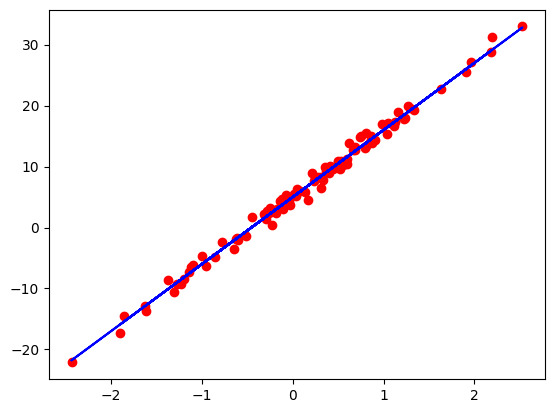

In [ ]:
# Don't modify this cell
num_samples = 100

np.random.seed(1)
noise = np.random.randn(num_samples, 1)
X = np.random.randn(num_samples, 1)

y_ideal = 11*X + 5
y_real = (11*X + 5) + noise

plt.plot(X, y_real, 'ro')
plt.plot(X, y_ideal, 'b')

We see that this data is clearly regressable with a line, which, ideally, would be 11x + 5

Train a linear regression model using gradient descent, you should see that training loss goes down with the number of iterations and obtain a theta that converges to a value very close to [b, m], which in this case, for 11x + 5, would be theta = [5, 11]

Also, notice the effect of the type of regularisation on the theta obtained (after convergence) as well as the testing MSE loss. Do they make sense, given what was discussed in class?


 Theta: [ 5. 11.] 
 Norm of Theta: 12.083045973589122 
 Testing MSELoss: 2.353407671545732e-22


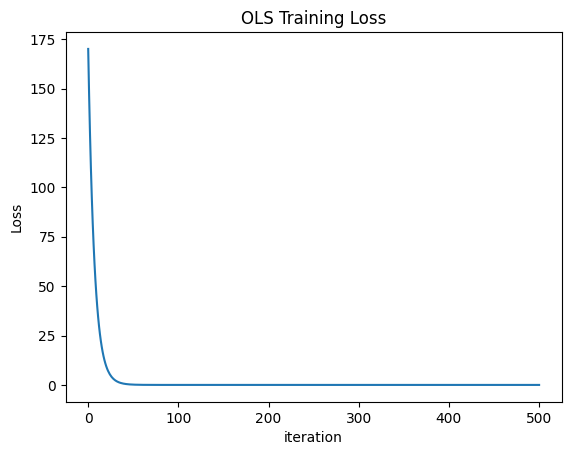


 Theta: [ 5.0017288  10.99009785] 
 Norm of Theta: 12.07474810132748 
 Testing MSELoss: 5.300473962153234e-05


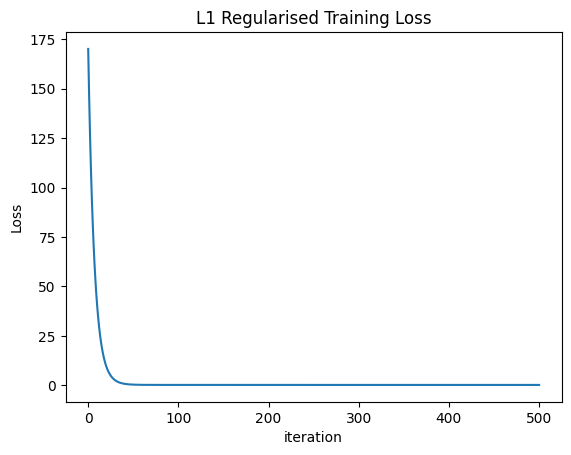


 Theta: [ 5.03729506 10.78638317] 
 Norm of Theta: 11.904637898268595 
 Testing MSELoss: 0.02466757081663394


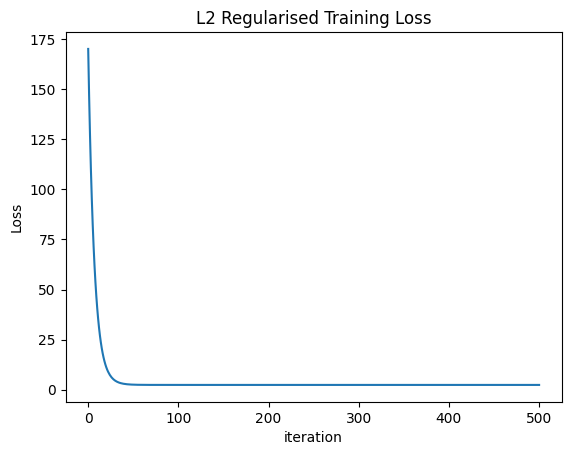

In [ ]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

def test_synthetic_data_sgd(X, y, n_iter = 2000, penalty=None, lambd=0):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=37)
  # Given that we want to get theta as the weights of the linear equation, we won't
  # standardize in this section

  alpha = 0.03  # Learning Rate

  # # Train the model
  lr_model = LinearRegression(alpha = alpha, tol=1e-4, max_iter = n_iter, penalty=penalty, lambd=lambd)
  lr_model.fit(X_train,y_train[:, 0])
  y_predict = lr_model.predict(X_test)
  loss = sklearn.metrics.mean_squared_error(y_predict, y_test)
  print()
  print(" Theta: {} \n Norm of Theta: {} \n Testing MSELoss: {}".format(lr_model.theta_, np.linalg.norm(lr_model.theta_, ord=2), loss))

  loss_history = lr_model.hist_cost_
  plt.plot(range(len(loss_history)), loss_history)
  plt.title("OLS Training Loss")
  plt.xlabel("iteration")
  plt.ylabel("Loss")
  if penalty == "l1":
    plt.title("L1 Regularised Training Loss")
  elif penalty == "l2":
    plt.title("L2 Regularised Training Loss")
  plt.show()

test_synthetic_data_sgd(X, y_ideal, 500)
test_synthetic_data_sgd(X, y_ideal, 500, "l1", 0.02)
test_synthetic_data_sgd(X, y_ideal, 500, "l2", 0.02)

## **1.3. Effect of polynomial degree on training and validation error [5 pts, manually graded]**

Now, we consider a dataset that was generated using some higher degree polynomial function of the input variable. We do not know the degree of the underlying polynomial. Let us assume it to be an unknown value "p" and try to estimate it.

Polynomial regression hypothesis for one input variable  or feature (x) can be written as:
> $y = w_0 + w_1x + w_2x^2 + ... + w_px^p $

If you observe carefully, this can still be solved as a linear regression, where, instead of just 2 weights, we have p+1 weights, and the new features are higher order terms of the original feature. Using this idea, in this section, we will investigate how changing the assumed polynomial degree "p" in our model affects the training and validation error.

In [ ]:
if not os.path.exists("cis519_hw2_poly_reg.csv"):
    !gdown --id 1F5cGpc9ayxf49RQskiJFlL0v5LzCP7dn

poly_reg_df = pd.read_csv('cis519_hw2_poly_reg.csv')

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1F5cGpc9ayxf49RQskiJFlL0v5LzCP7dn
To: /content/cis519_hw2_poly_reg.csv
100% 50.7k/50.7k [00:00<00:00, 86.8MB/s]


In [ ]:
import sklearn
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LinearRegressionSklearn
from sklearn.metrics import mean_squared_error

def polynomial_regression(poly_reg_df, degrees):
    """
    Runs polynomial regression on the dataset 'poly_reg_df' for all the powers in 'degrees'
    """

    loss_train_list = []
    loss_test_list = []

    X_base = poly_reg_df.iloc[:, :-1].values
    y = poly_reg_df.iloc[:, -1].values

    for d in degrees:

        # TODO START: Complete the function:
        # 1. Transform the base feature X_base into its polynomial features of degree 'd' using PolynomialFeatures
        # Set include_bias to be False
        poly_features = PolynomialFeatures(degree=d, include_bias=False)
        X_poly = poly_features.fit_transform(X_base)

        # 2. Preprocessing and splitting into train/test (70-30 ratio and random_state as 42)
        X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

        # 3. Scale X_train and X_test appropriately
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # 4. Use scikit-learn's LinearRegression (imported as LinearRegressionSklearn for you) to
        # fit a linear model between the scaled version of X_train and y_train
        model = LinearRegressionSklearn()
        model.fit(X_train_scaled, y_train)

        # 5. Obtain predictions of the model on train and test data
        y_train_pred = model.predict(X_train_scaled)
        y_test_pred = model.predict(X_test_scaled)

        # 6. Compute the mean squared error and store it in loss_train and loss_test
        loss_train = mean_squared_error(y_train, y_train_pred)
        loss_test = mean_squared_error(y_test, y_test_pred)

        # 7. Append loss_train to loss_train_list and loss_test to loss_test_list
        loss_train_list.append(loss_train)
        loss_test_list.append(loss_test)

    return  loss_train_list, loss_test_list
    # TODO END

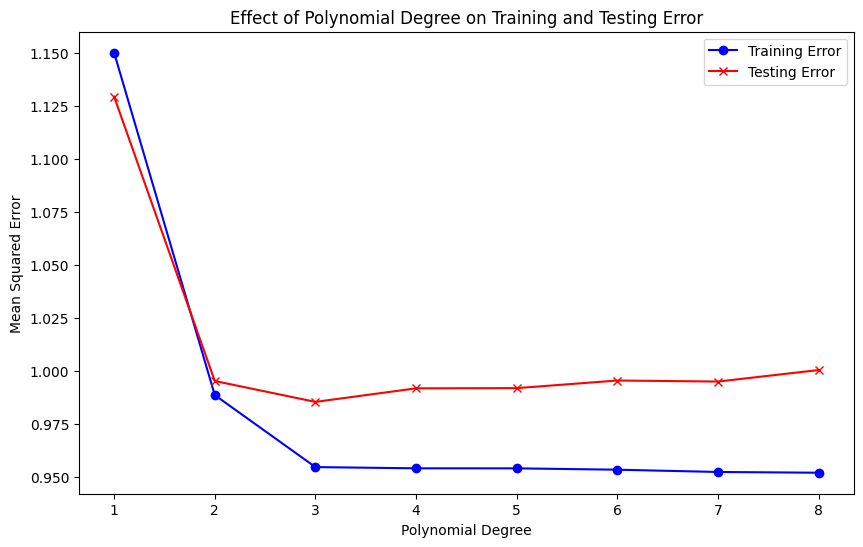

In [ ]:
degrees = np.arange(1, 9)

loss_train_list, loss_test_list = polynomial_regression(poly_reg_df, degrees)

# TODO START:
# Plot the polynomial degrees (x-axis) against loss_train_list (y-axis) and loss_test_list (y-axis) in a single plot, with different colors.
# Make sure to include x and y axis labels, legend as well as the title


# Plot the polynomial degrees against loss_train_list and loss_test_list
plt.figure(figsize=(10, 6))
plt.plot(degrees, loss_train_list, label='Training Error', color='blue', marker='o')
plt.plot(degrees, loss_test_list, label='Testing Error', color='red', marker='x')

# Adding labels, title, and legend
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('Effect of Polynomial Degree on Training and Testing Error')
plt.legend()

# Show plot
plt.show()
# TODO END

**Attach the plot to your written homework solutions. Describe the trends in the plot obtained. Briefly explain the reasoning behind why this would happen.**

## **1.4. Effect of learning rate on gradient descent [5 pts, manually graded]**



Run the below cell to download the dataset.

In [ ]:
if not os.path.exists("cis519_hw2_admit.csv"):
    !gdown --id 1CSD1vA9qZucuevxCuaOwr91tBaZcjNNh

train_df = pd.read_csv("cis519_hw2_admit.csv")

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1CSD1vA9qZucuevxCuaOwr91tBaZcjNNh
To: /content/cis519_hw2_admit.csv
100% 3.61k/3.61k [00:00<00:00, 15.7MB/s]


The dataset contains two features - scores in two exams and the target variable is whether the student was admitted into a college or not. Your task for this question is to use this dataset and plot the variation of cost function with respect to the number of gradient descent iterations for different learning rates. Perform the following steps.

1. Scale the features using StandardScaler
2. For each of the learning rates - {0.001, 0.01, 0.03, 0.1, 1.0}, fit a linear regression model to the scaled data by running a maximum of 100 iterations of gradient descent with L2 penalty and $\lambda$ as 0.001.
3. Show the variation of the cost (stored in `hist_cost_`) with respect to the number of iterations for all the learning rates in the same plot.

Submit the plot along with the written homework solutions. The plot should have an appropriate title, axes labels, and legend. Briefly comment on the effect of increasing learning rate and what would be the best learning rate among the four values based on the plot.

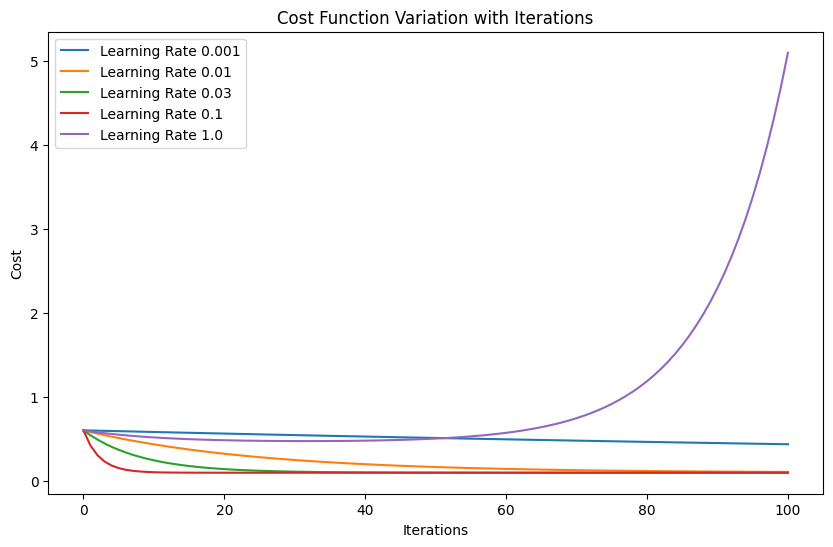

In [ ]:
# STUDENT CODE STARTS:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(train_df[['Exam 1 Score', 'Exam 2 Score']].values)

plt.figure(figsize=(10, 6))
learning_rates = [0.001, 0.01, 0.03, 0.1, 1.0]
for lr in learning_rates:
    # Initialize the model
    model = LinearRegression(alpha=lr, max_iter=100, lambd=0.001, penalty='l2')

    # Fit the model
    model.fit(X_scaled, train_df['Admit'].values)

    # Plot cost history
    plt.plot(model.hist_cost_, label=f'Learning Rate {lr}')

# Add plot details
plt.title('Cost Function Variation with Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.show()
# STUDENT CODE ENDS

According to this table, learning rate of 0.03 would be best for this linear regression problem. We can see learning rate 1.0 diverge as it is too large of a step size, and learning rate 0.001 never truly minimize because it is too slow to do so within 100 iterations. On the other hand, learning rate 0.1 is good but it converges too soon, meaning it may be not be the optimal solution since parameters could be high and there could be possible overfitting. Learning rate of 0.01 comes close to the performance of 0.03 but it takes longer to converge and if there were fewer iterations it would not perform so well. The learning rate of 0.03 is ideal in this case because it converges at a reasonable rate.

Download the .ipynb notebook and submit on Gradescope.